# Data Preparation 

## Prerequisites and imports

In [1]:
import pandas as pd
from ordered_set import OrderedSet
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
# specifying the path to csv files
path = '/Users/philine/SynologyDrive/Projects/Plastics/Data/CSV_min'

# Import CSV file

In [3]:
# csv files in the path
files = glob.glob(path + "/*.csv")
  
# define an empty list to store content
data = pd.DataFrame()
content = []
  
# check all the csv files in the specified path 
for filename in files:
    
    # read content of csv file
    df = pd.read_csv(filename, index_col=None)
    content.append(df)
  
 # convert content to data frame
data = pd.concat(content)

data

,ID,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,REACTIONS,LENGTH SC.,KEGG SC.,GRAPH
0,1,5,C11505 => C02001 => C01471 => C05608 => C06561...,Propene => 2-Propen-1-ol => Propenal => p-Coum...,"rat21804, rat10619, rat19578, rat19683, rat132191",0.2,0,Graph
1,2,5,C11505 => C02001 => C05855 => C01600 => C04608...,Propene => 2-Propen-1-ol => 4-Hydroxycinnamyl ...,"rat21804, rat19601, rat45105, rat45020, rat142952",0.2,0,Graph
2,3,5,C11505 => C02001 => C05855 => C00842 => C01460...,Propene => 2-Propen-1-ol => 4-Hydroxycinnamyl ...,"rat21804, rat19601, rat44607, rat44474, rat142943",0.2,0,Graph
3,4,5,C11505 => C02001 => C05855 => C00842 => C01714...,Propene => 2-Propen-1-ol => 4-Hydroxycinnamyl ...,"rat21804, rat19601, rat44607, rat44476, rat142945",0.2,0,Graph
4,5,5,C11505 => C02001 => C05855 => C00842 => C04608...,Propene => 2-Propen-1-ol => 4-Hydroxycinnamyl ...,"rat21804, rat19601, rat44607, rat44572, rat142952",0.2,0,Graph
...,...,...,...,...,...,...,...,...
19,20,5,C06547 => C00511 => C04415 => C00498 => C04608...,Ethylene => Acrylate => 4-O-beta-D-Glucosyl-4-...,"rat131441, rat19475, rat42928, rat42942, rat14...",0.2,0,Graph
20,21,5,C06547 => C00511 => C04415 => C00498 => C01714...,Ethylene => Acrylate => 4-O-beta-D-Glucosyl-4-...,"rat131441, rat19475, rat42928, rat42868, rat14...",0.2,0,Graph
21,22,5,C06547 => C00511 => C04415 => C04507 => C04608...,Ethylene => Acrylate => 4-O-beta-D-Glucosyl-4-...,"rat131441, rat19475, rat45380, rat45600, rat14...",0.2,0,Graph
0,1,5,C11505 => C02001 => C01471 => C10945 => C15525...,Propene => 2-Propen-1-ol => Propenal => Caffey...,"rat21804, rat10619, rat18116, rat18526, rat132271",0.2,0,Graph


##  drop unnecessary data, reset index and transform data 

In [4]:
data = data.drop(['ID', 'KEGG SC.', 'GRAPH'], axis=1)

data.reset_index(drop = True, inplace=True)

data['INTERMEDIATES KEGG'] = data['INTERMEDIATES KEGG'].str.split(' => ')
data['INTERMEDIATE NAMES'] = data['INTERMEDIATE NAMES'].str.split(' => ')
data['REACTIONS'] = data['REACTIONS'].str.split(', ')

data

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,REACTIONS,LENGTH SC.
0,5,"[C11505, C02001, C01471, C05608, C06561, C00509]","[Propene, 2-Propen-1-ol, Propenal, p-Coumarald...","[rat21804, rat10619, rat19578, rat19683, rat13...",0.2
1,5,"[C11505, C02001, C05855, C01600, C04608, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","[rat21804, rat19601, rat45105, rat45020, rat14...",0.2
2,5,"[C11505, C02001, C05855, C00842, C01460, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","[rat21804, rat19601, rat44607, rat44474, rat14...",0.2
3,5,"[C11505, C02001, C05855, C00842, C01714, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","[rat21804, rat19601, rat44607, rat44476, rat14...",0.2
4,5,"[C11505, C02001, C05855, C00842, C04608, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","[rat21804, rat19601, rat44607, rat44572, rat14...",0.2
...,...,...,...,...,...
1722,5,"[C06547, C00511, C04415, C00498, C04608, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...","[rat131441, rat19475, rat42928, rat42942, rat1...",0.2
1723,5,"[C06547, C00511, C04415, C00498, C01714, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...","[rat131441, rat19475, rat42928, rat42868, rat1...",0.2
1724,5,"[C06547, C00511, C04415, C04507, C04608, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...","[rat131441, rat19475, rat45380, rat45600, rat1...",0.2
1725,5,"[C11505, C02001, C01471, C10945, C15525, C05631]","[Propene, 2-Propen-1-ol, Propenal, Caffeyl ald...","[rat21804, rat10619, rat18116, rat18526, rat13...",0.2


## export as csv

In [5]:
data.to_csv('CSV.csv', index = False)

In [6]:
csv = pd.read_csv('CSV.csv')
csv['INTERMEDIATES KEGG'] = csv['INTERMEDIATES KEGG'].apply(lambda x: ast.literal_eval(x))
csv['INTERMEDIATE NAMES'] = csv['INTERMEDIATE NAMES'].apply(lambda x: ast.literal_eval(x))
csv

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,REACTIONS,LENGTH SC.
0,5,"[C11505, C02001, C01471, C05608, C06561, C00509]","[Propene, 2-Propen-1-ol, Propenal, p-Coumarald...","['rat21804', 'rat10619', 'rat19578', 'rat19683...",0.2
1,5,"[C11505, C02001, C05855, C01600, C04608, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","['rat21804', 'rat19601', 'rat45105', 'rat45020...",0.2
2,5,"[C11505, C02001, C05855, C00842, C01460, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","['rat21804', 'rat19601', 'rat44607', 'rat44474...",0.2
3,5,"[C11505, C02001, C05855, C00842, C01714, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","['rat21804', 'rat19601', 'rat44607', 'rat44476...",0.2
4,5,"[C11505, C02001, C05855, C00842, C04608, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...","['rat21804', 'rat19601', 'rat44607', 'rat44572...",0.2
...,...,...,...,...,...
1722,5,"[C06547, C00511, C04415, C00498, C04608, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...","['rat131441', 'rat19475', 'rat42928', 'rat4294...",0.2
1723,5,"[C06547, C00511, C04415, C00498, C01714, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...","['rat131441', 'rat19475', 'rat42928', 'rat4286...",0.2
1724,5,"[C06547, C00511, C04415, C04507, C04608, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...","['rat131441', 'rat19475', 'rat45380', 'rat4560...",0.2
1725,5,"[C11505, C02001, C01471, C10945, C15525, C05631]","[Propene, 2-Propen-1-ol, Propenal, Caffeyl ald...","['rat21804', 'rat10619', 'rat18116', 'rat18526...",0.2


# create dataset containing source and target columns

In [7]:
# create copy of fataset 
pathways = csv.copy()

# drop unnecessary columns
pathways = pathways.drop(['REACTIONS', 'LENGTH SC.'], axis=1)

# create empty lists for the source and target compounds
source = []
target = []

# add compounds
for i in pathways['INTERMEDIATE NAMES']:
    source.append(i[0])
    target.append(i[-1])
    
pathways['SOURCE'] = source
pathways['TARGET'] = target

pathways

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,SOURCE,TARGET
0,5,"[C11505, C02001, C01471, C05608, C06561, C00509]","[Propene, 2-Propen-1-ol, Propenal, p-Coumarald...",Propene,Naringenin
1,5,"[C11505, C02001, C05855, C01600, C04608, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...",Propene,Naringenin
2,5,"[C11505, C02001, C05855, C00842, C01460, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...",Propene,Naringenin
3,5,"[C11505, C02001, C05855, C00842, C01714, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...",Propene,Naringenin
4,5,"[C11505, C02001, C05855, C00842, C04608, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...",Propene,Naringenin
...,...,...,...,...,...
1722,5,"[C06547, C00511, C04415, C00498, C04608, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...",Ethylene,Apigenin
1723,5,"[C06547, C00511, C04415, C00498, C01714, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...",Ethylene,Apigenin
1724,5,"[C06547, C00511, C04415, C04507, C04608, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...",Ethylene,Apigenin
1725,5,"[C11505, C02001, C01471, C10945, C15525, C05631]","[Propene, 2-Propen-1-ol, Propenal, Caffeyl ald...",Propene,Eriodictyol


# create list containing all target products

In [8]:
# create list containing all targets
target_list = [i for i in pathways['TARGET']]

target_list = list(set(target_list))

# get number of targets
print(len(target_list))
target_list

20


['6-Methylsalicylate',
 'L-Lactate',
 'Vanillin',
 'Luteolin',
 'N-Methylanthranilate',
 'Eriodictyol',
 'Pinocembrin',
 'Succinate',
 'Geraniol',
 'Naringenin',
 'Apigenin',
 'Dihydrocaffeic acid',
 'Cortisone',
 'Cortisol',
 'Resveratrol',
 'beta-Carotene',
 'Homoeriodictyol',
 'n-Butanol',
 'Chrysin',
 'Hydrocortisone caproate']

# CREATE data set per plastic source

## Propene

In [9]:
# create a copy of plastics data frame
propene = pathways.copy()

# keep only rows/reactions starting with propene
propene.drop(propene[propene['SOURCE'] != 'Propene'].index, inplace=True)

propene

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,SOURCE,TARGET
0,5,"[C11505, C02001, C01471, C05608, C06561, C00509]","[Propene, 2-Propen-1-ol, Propenal, p-Coumarald...",Propene,Naringenin
1,5,"[C11505, C02001, C05855, C01600, C04608, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...",Propene,Naringenin
2,5,"[C11505, C02001, C05855, C00842, C01460, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...",Propene,Naringenin
3,5,"[C11505, C02001, C05855, C00842, C01714, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...",Propene,Naringenin
4,5,"[C11505, C02001, C05855, C00842, C04608, C00509]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...",Propene,Naringenin
...,...,...,...,...,...
1676,5,"[C11505, C14395, C00146, C00292, A00210, C03005]","[Propene, alpha-Methylstyrene, Phenol, Aniline...",Propene,N-Methylanthranilate
1677,5,"[C11505, C14395, C00146, C00292, C02299, C03005]","[Propene, alpha-Methylstyrene, Phenol, Aniline...",Propene,N-Methylanthranilate
1678,5,"[C11505, C14395, C00146, C03141, A00210, C03005]","[Propene, alpha-Methylstyrene, Phenol, N-Benzo...",Propene,N-Methylanthranilate
1725,5,"[C11505, C02001, C01471, C10945, C15525, C05631]","[Propene, 2-Propen-1-ol, Propenal, Caffeyl ald...",Propene,Eriodictyol


## Terephthalate

In [10]:
# create a copy of plastics data frame
terephthalate = pathways.copy()

# keep only rows/reactions starting with terephthalate
terephthalate.drop(terephthalate[terephthalate['SOURCE'] != 'Terephthalate'].index, inplace=True)

terephthalate

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,SOURCE,TARGET
538,4,"[C06337, C00180, C00193, C09816, A00704]","[Terephthalate, Benzoate, Benzaldehyde, Benzyl...",Terephthalate,Succinate
539,4,"[C06337, C00180, C15524, A00705, A00704]","[Terephthalate, Benzoate, Phenylglyoxylyl-CoA,...",Terephthalate,Succinate
540,4,"[C06337, C00180, C15524, C02232, A00704]","[Terephthalate, Benzoate, Phenylglyoxylyl-CoA,...",Terephthalate,Succinate
541,4,"[C06337, C00180, C07118, A00705, A00704]","[Terephthalate, Benzoate, Benzoyl acetyl-CoA, ...",Terephthalate,Succinate
542,4,"[C06337, C00180, C07118, C02232, A00704]","[Terephthalate, Benzoate, Benzoyl acetyl-CoA, ...",Terephthalate,Succinate
...,...,...,...,...,...
1698,5,"[C06337, C00156, C03993, C00096, C03951, C01514]","[Terephthalate, 4-Hydroxybenzoate, 4-(beta-D-G...",Terephthalate,Luteolin
1699,5,"[C06337, C00156, C03993, C00096, C01821, C01514]","[Terephthalate, 4-Hydroxybenzoate, 4-(beta-D-G...",Terephthalate,Luteolin
1700,5,"[C06337, C00156, C03993, C00498, C10114, C01514]","[Terephthalate, 4-Hydroxybenzoate, 4-(beta-D-G...",Terephthalate,Luteolin
1701,5,"[C06337, C00156, C03993, C00498, C03951, C01514]","[Terephthalate, 4-Hydroxybenzoate, 4-(beta-D-G...",Terephthalate,Luteolin


## Ethylene

In [11]:
# create a copy of plastics data frame
ethylene = pathways.copy()

# keep only rows/reactions starting with ethylene
ethylene.drop(ethylene[ethylene['SOURCE'] != 'Ethylene'].index, inplace=True)

ethylene

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,SOURCE,TARGET
178,6,"[C06547, C00511, C01471, C10945, C02666, C1640...","[Ethylene, Acrylate, Propenal, Caffeyl aldehyd...",Ethylene,Homoeriodictyol
179,6,"[C06547, C00511, C04415, C00498, C05990, C0429...","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...",Ethylene,Homoeriodictyol
180,6,"[C06547, C20701, C01471, C10945, C15525, C0563...","[Ethylene, But-3-en-2-one, Propenal, Caffeyl a...",Ethylene,Homoeriodictyol
181,6,"[C06547, C20701, C01471, C10945, C02666, C1640...","[Ethylene, But-3-en-2-one, Propenal, Caffeyl a...",Ethylene,Homoeriodictyol
182,6,"[C06547, C00511, C04415, C04507, C05990, C0429...","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...",Ethylene,Homoeriodictyol
...,...,...,...,...,...
1720,5,"[C06547, C00511, C04415, C00096, C01714, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...",Ethylene,Apigenin
1721,5,"[C06547, C00511, C04415, C00096, C01460, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...",Ethylene,Apigenin
1722,5,"[C06547, C00511, C04415, C00498, C04608, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...",Ethylene,Apigenin
1723,5,"[C06547, C00511, C04415, C00498, C01714, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...",Ethylene,Apigenin


## Styrene

In [12]:
# create a copy of plastics data frame
styrene = pathways.copy()

# keep only rows/reactions starting with styrene
styrene.drop(styrene[styrene['SOURCE'] != 'Styrene'].index, inplace=True)

styrene

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,SOURCE,TARGET
375,3,"[C07083, C00146, C00805, C02657]","[Styrene, Phenol, SALC, 6-Methylsalicylate]",Styrene,6-Methylsalicylate
376,3,"[C07083, C00146, C01467, C02657]","[Styrene, Phenol, m-Cresol, 6-Methylsalicylate]",Styrene,6-Methylsalicylate
377,3,"[C07083, C09321, C00805, C02657]","[Styrene, 2'-Hydroxychalcone, SALC, 6-Methylsa...",Styrene,6-Methylsalicylate
378,5,"[C07083, C00146, C02578, C00031, C04608, C01477]","[Styrene, Phenol, Phenylgalactoside, D-Glucose...",Styrene,Apigenin
379,5,"[C07083, C00423, C04164, C00501, C04608, C01477]","[Styrene, Cinnamate, trans-Cinnamoyl beta-D-gl...",Styrene,Apigenin
...,...,...,...,...,...
1573,4,"[C07083, C00146, C03141, A00210, C03005]","[Styrene, Phenol, N-Benzoylanthranilate, Anthr...",Styrene,N-Methylanthranilate
1574,4,"[C07083, C09321, C00805, A00210, C03005]","[Styrene, 2'-Hydroxychalcone, SALC, Anthranila...",Styrene,N-Methylanthranilate
1597,5,"[C07083, C00146, C00540, A00705, C15429, C00762]","[Styrene, Phenol, Cinnamoyl-CoA, Succinyl-CoA,...",Styrene,Cortisone
1598,5,"[C07083, C00146, C07118, A00705, C15429, C00762]","[Styrene, Phenol, Benzoyl acetyl-CoA, Succinyl...",Styrene,Cortisone


## Vinyl chloride

In [13]:
# create a copy of plastics data frame
vinyl_chloride = pathways.copy()

# keep only rows/reactions starting with vinyl chloride
vinyl_chloride.drop(vinyl_chloride[vinyl_chloride['SOURCE'] != 'Vinyl chloride'].index, inplace=True)

vinyl_chloride

,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,SOURCE,TARGET
42,6,"[C06793, C06547, C00511, C01471, C05608, C0656...","[Vinyl chloride, Ethylene, Acrylate, Propenal,...",Vinyl chloride,Naringenin
43,6,"[C06793, C06614, A00264, C00383, C10020, C0460...","[Vinyl chloride, trans-3-Chloroacrylic acid, C...",Vinyl chloride,Naringenin
44,6,"[C06793, C20609, C00511, C04415, C00498, C0909...","[Vinyl chloride, 2-Chloroacrylate, Acrylate, 4...",Vinyl chloride,Naringenin
45,6,"[C06793, C20609, C00511, C04415, C00498, C0460...","[Vinyl chloride, 2-Chloroacrylate, Acrylate, 4...",Vinyl chloride,Naringenin
46,6,"[C06793, C20609, C00511, C04415, C00498, C0171...","[Vinyl chloride, 2-Chloroacrylate, Acrylate, 4...",Vinyl chloride,Naringenin
...,...,...,...,...,...
1660,6,"[C06793, C06614, C00511, C00423, C00146, C0080...","[Vinyl chloride, trans-3-Chloroacrylic acid, A...",Vinyl chloride,6-Methylsalicylate
1661,6,"[C06793, C06614, C00511, C00423, C00146, C0146...","[Vinyl chloride, trans-3-Chloroacrylic acid, A...",Vinyl chloride,6-Methylsalicylate
1662,6,"[C06793, C06614, C00511, C00423, C09321, C0080...","[Vinyl chloride, trans-3-Chloroacrylic acid, A...",Vinyl chloride,6-Methylsalicylate
1663,6,"[C06793, C06614, C00511, C01772, C00090, C0080...","[Vinyl chloride, trans-3-Chloroacrylic acid, A...",Vinyl chloride,6-Methylsalicylate


# Plot graphs showing target compound (x) and pathway length (y)

##  Propene

In [14]:
# group by target. As all lengths for each pair are the same, it is enough to keep only the first.

propene = propene.groupby('TARGET').first().reset_index()
propene

,TARGET,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,SOURCE
0,6-Methylsalicylate,4,"[C11505, C14395, C00146, C00805, C02657]","[Propene, alpha-Methylstyrene, Phenol, SALC, 6...",Propene
1,Apigenin,5,"[C11505, C02001, C05855, C00031, C04608, C01477]","[Propene, 2-Propen-1-ol, 4-Hydroxycinnamyl alc...",Propene
2,Chrysin,6,"[C11505, C02001, C01471, C05608, C06561, C0050...","[Propene, 2-Propen-1-ol, Propenal, p-Coumarald...",Propene
3,Cortisone,5,"[C11505, C01771, C00877, A00705, C15429, C00762]","[Propene, 2-Butenoate, Crotonyl-CoA, Succinyl-...",Propene
4,Dihydrocaffeic acid,4,"[C11505, C01771, C00511, C01197, C10447]","[Propene, 2-Butenoate, Acrylate, Caffeate, Dih...",Propene
5,Eriodictyol,5,"[C11505, C02001, C01471, C10945, C15525, C05631]","[Propene, 2-Propen-1-ol, Propenal, Caffeyl ald...",Propene
6,Geraniol,5,"[C11505, C00583, C00116, C05401, C03799, C01500]","[Propene, 1,2-Propanediol, Glycerol, 3-beta-D-...",Propene
7,Homoeriodictyol,6,"[C11505, C02001, C01471, C10945, C02666, C1640...","[Propene, 2-Propen-1-ol, Propenal, Caffeyl ald...",Propene
8,Hydrocortisone caproate,4,"[C11505, C01771, C00877, C05270, C13422]","[Propene, 2-Butenoate, Crotonyl-CoA, Hexanoyl-...",Propene
9,L-Lactate,3,"[C11505, C01845, C00469, C00186]","[Propene, 2-Propanol, Ethanol, L-Lactate]",Propene


In [15]:
p_list = [elem for elem in propene['TARGET']]

# get number of targets
print(len(p_list))

# print target(s) not present for this plastic
p_list = [elem for elem in target_list if elem not in p_list]
p_list

19


['Cortisol']

In [16]:
# delete unnecessary columns
propene = propene.drop(['INTERMEDIATES KEGG', 'INTERMEDIATE NAMES'], axis=1)

In [17]:
# create new df
for i in p_list:
    propene.loc[len(propene)] = [i, 0, 'Propene']

propene

,TARGET,LENGTH,SOURCE
0,6-Methylsalicylate,4,Propene
1,Apigenin,5,Propene
2,Chrysin,6,Propene
3,Cortisone,5,Propene
4,Dihydrocaffeic acid,4,Propene
5,Eriodictyol,5,Propene
6,Geraniol,5,Propene
7,Homoeriodictyol,6,Propene
8,Hydrocortisone caproate,4,Propene
9,L-Lactate,3,Propene


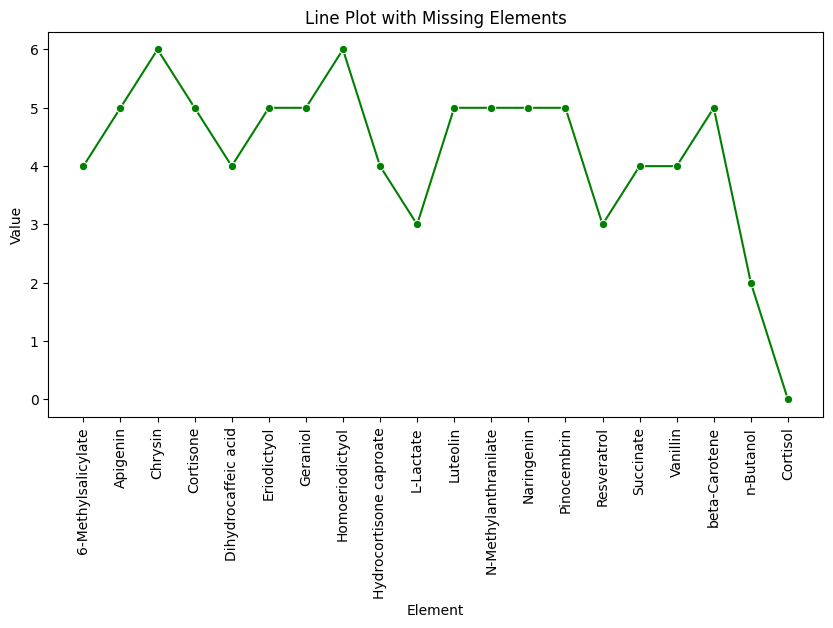

In [18]:
# plot length of pathways
plt.figure(figsize=(10, 5))
sns.lineplot(data=propene, x='TARGET', y='LENGTH', marker='o', color = 'green')

plt.xlabel('Element')
plt.ylabel('Value')
plt.title('Line Plot with Missing Elements')
plt.xticks(rotation=90)

plt.show()

## Terephthalate

In [19]:
# group by target. As all lengths for each pair are the same, it is enough to keep only the first.

terephthalate = terephthalate.groupby('TARGET').first().reset_index()
terephthalate

,TARGET,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,SOURCE
0,6-Methylsalicylate,3,"[C06337, C00180, C00805, C02657]","[Terephthalate, Benzoate, SALC, 6-Methylsalicy...",Terephthalate
1,Apigenin,5,"[C06337, C00156, C03993, C00031, C04608, C01477]","[Terephthalate, 4-Hydroxybenzoate, 4-(beta-D-G...",Terephthalate
2,Chrysin,6,"[C06337, C00180, C00146, C00903, C16404, C0982...","[Terephthalate, Benzoate, Phenol, Cinnamaldehy...",Terephthalate
3,Cortisol,5,"[C06337, C00180, C15524, A00705, C08178, C00735]","[Terephthalate, Benzoate, Phenylglyoxylyl-CoA,...",Terephthalate
4,Cortisone,5,"[C06337, C00180, C15524, A00705, C15429, C00762]","[Terephthalate, Benzoate, Phenylglyoxylyl-CoA,...",Terephthalate
5,Dihydrocaffeic acid,4,"[C06337, C00156, C18216, C01744, C10447]","[Terephthalate, 4-Hydroxybenzoate, 4-Hydroxyph...",Terephthalate
6,Eriodictyol,6,"[C06337, C06318, C00230, C01424, C03743, C1552...","[Terephthalate, Terephthalate-1,2-cis-dihydrod...",Terephthalate
7,Geraniol,4,"[C06337, C00156, C05848, C00341, C01500]","[Terephthalate, 4-Hydroxybenzoate, 4-Hydroxy-3...",Terephthalate
8,Homoeriodictyol,6,"[C06337, C06318, C00230, C01424, C03743, C1640...","[Terephthalate, Terephthalate-1,2-cis-dihydrod...",Terephthalate
9,Hydrocortisone caproate,4,"[C06337, C00180, C15524, C05270, C13422]","[Terephthalate, Benzoate, Phenylglyoxylyl-CoA,...",Terephthalate


In [20]:
terephthalate = terephthalate.drop(['INTERMEDIATES KEGG', 'INTERMEDIATE NAMES'], axis=1)

t_list = [elem for elem in terephthalate['TARGET']]

# get number of targets
print(len(t_list))

# print target(s) not present for this plastic
t_list = [elem for elem in target_list if elem not in t_list]
t_list

20


[]

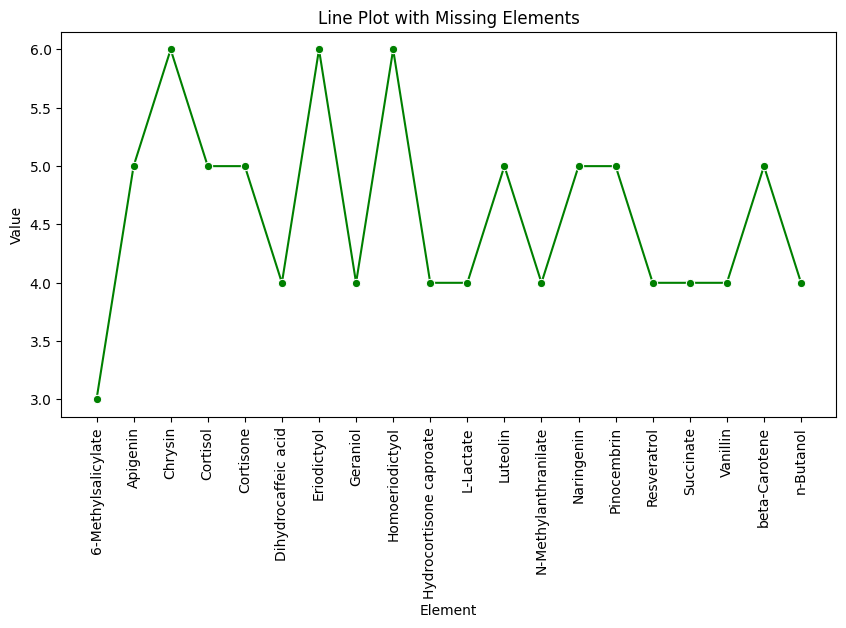

In [21]:
# plot pathway length

# create new df
for i in t_list:
    terephthalate.loc[len(terephthalate)] = [i, 0, 'Terephthalate']

plt.figure(figsize=(10, 5))
sns.lineplot(data=terephthalate, x='TARGET', y='LENGTH', marker='o', color = 'green')

plt.xlabel('Element')
plt.ylabel('Value')
plt.title('Line Plot with Missing Elements')
plt.xticks(rotation=90)

plt.show()

## Ethylene

In [22]:
# group by target. As all lengths for each pair are the same, it is enough to keep only the first.

ethylene = ethylene.groupby('TARGET').first().reset_index()
ethylene

,TARGET,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,SOURCE
0,6-Methylsalicylate,5,"[C06547, C11505, C14395, C00146, C00805, C02657]","[Ethylene, Propene, alpha-Methylstyrene, Pheno...",Ethylene
1,Apigenin,5,"[C06547, C00511, C04415, C00031, C04608, C01477]","[Ethylene, Acrylate, 4-O-beta-D-Glucosyl-4-hyd...",Ethylene
2,Chrysin,6,"[C06547, C00511, C01471, C05608, C06561, C0050...","[Ethylene, Acrylate, Propenal, p-Coumaraldehyd...",Ethylene
3,Cortisone,5,"[C06547, C00511, A00383, A00704, C15429, C00762]","[Ethylene, Acrylate, Fumarate, Succinate, 17,2...",Ethylene
4,Dihydrocaffeic acid,3,"[C06547, C00511, C01197, C10447]","[Ethylene, Acrylate, Caffeate, Dihydrocaffeic ...",Ethylene
5,Eriodictyol,5,"[C06547, C00511, C01471, C10945, C15525, C05631]","[Ethylene, Acrylate, Propenal, Caffeyl aldehyd...",Ethylene
6,Geraniol,5,"[C06547, C01380, C00258, C11544, C03799, C01500]","[Ethylene, 1,2-Ethanediol, Glycerate, 2(alpha-...",Ethylene
7,Homoeriodictyol,6,"[C06547, C00511, C01471, C10945, C02666, C1640...","[Ethylene, Acrylate, Propenal, Caffeyl aldehyd...",Ethylene
8,Hydrocortisone caproate,4,"[C06547, C00511, C00894, C05270, C13422]","[Ethylene, Acrylate, Acrylyl-CoA, Hexanoyl-CoA...",Ethylene
9,L-Lactate,2,"[C06547, C00469, C00186]","[Ethylene, Ethanol, L-Lactate]",Ethylene


In [23]:
ethylene = ethylene.drop(['INTERMEDIATES KEGG', 'INTERMEDIATE NAMES'], axis=1)

e_list = [elem for elem in ethylene['TARGET']]

# get number of targets
print(len(e_list))


# print target(s) not present for this plastic
e_list = [elem for elem in target_list if elem not in e_list]

# create new df
for i in e_list:
    ethylene.loc[len(ethylene)] = [i, 0, 'ethylene']

print(e_list)

19
['Cortisol']


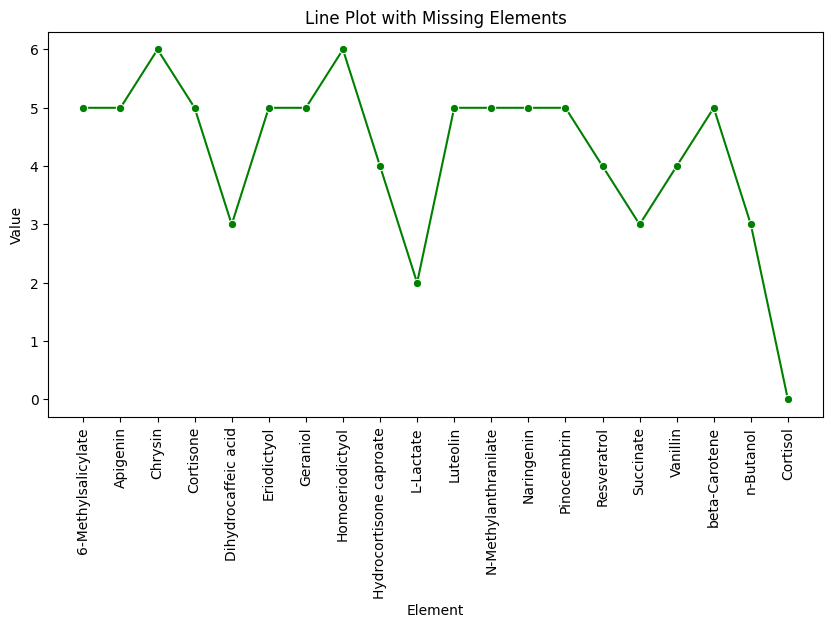

In [24]:
# plot pathway length
plt.figure(figsize=(10, 5))
sns.lineplot(data=ethylene, x='TARGET', y='LENGTH', marker='o', color = 'green')

plt.xlabel('Element')
plt.ylabel('Value')
plt.title('Line Plot with Missing Elements')
plt.xticks(rotation=90)

plt.show()

## Styrene

In [25]:
# group by target. As all lengths for each pair are the same, it is enough to keep only the first.

styrene = styrene.groupby('TARGET').first().reset_index()
styrene

,TARGET,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,SOURCE
0,6-Methylsalicylate,3,"[C07083, C00146, C00805, C02657]","[Styrene, Phenol, SALC, 6-Methylsalicylate]",Styrene
1,Apigenin,5,"[C07083, C00146, C02578, C00031, C04608, C01477]","[Styrene, Phenol, Phenylgalactoside, D-Glucose...",Styrene
2,Chrysin,4,"[C07083, C09321, C00766, C11264, C10028]","[Styrene, 2'-Hydroxychalcone, Flavanone, 7-Hyd...",Styrene
3,Cortisone,5,"[C07083, C00146, C00540, A00705, C15429, C00762]","[Styrene, Phenol, Cinnamoyl-CoA, Succinyl-CoA,...",Styrene
4,Dihydrocaffeic acid,4,"[C07083, C05627, C06224, C01197, C10447]","[Styrene, 4-Vinylphenol, 3,4-Dihydroxystyrene,...",Styrene
5,Eriodictyol,5,"[C07083, C05853, C10484, C10945, C15525, C05631]","[Styrene, 2-phenylethanol, Phenethyl caffeate,...",Styrene
6,Geraniol,4,"[C07083, C00146, C05807, C00341, C01500]","[Styrene, Phenol, 2-Polyprenylphenol, Geranyl ...",Styrene
7,Homoeriodictyol,5,"[C07083, C01745, C02183, C03743, C16405, C09756]","[Styrene, Pinosylvin, Phloroglucinol, 1,2,3,5-...",Styrene
8,Hydrocortisone caproate,4,"[C07083, C00146, C00540, C05270, C13422]","[Styrene, Phenol, Cinnamoyl-CoA, Hexanoyl-CoA,...",Styrene
9,L-Lactate,3,"[C07083, C00423, C00511, C00186]","[Styrene, Cinnamate, Acrylate, L-Lactate]",Styrene


In [26]:
styrene = styrene.drop(['INTERMEDIATES KEGG', 'INTERMEDIATE NAMES'], axis=1)

s_list = [elem for elem in styrene['TARGET']]

# get number of targets
print(len(s_list))

# print target(s) not present for this plastic
s_list = [elem for elem in target_list if elem not in s_list]

# create new df
for i in s_list:
    styrene.loc[len(styrene)] = [i, 0, 'styrene']

s_list

19


['Cortisol']

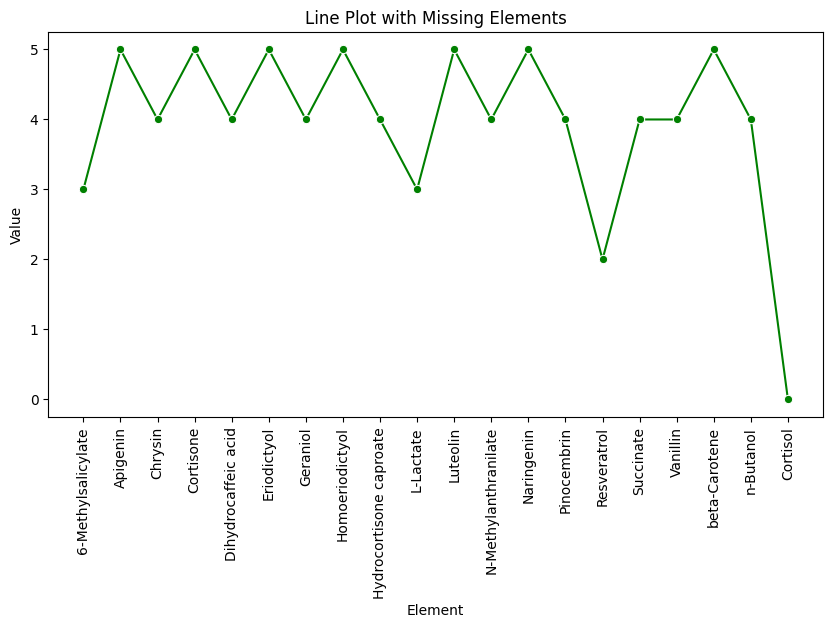

In [27]:
# plot pathway lengths
plt.figure(figsize=(10, 5))
sns.lineplot(data=styrene, x='TARGET', y='LENGTH', marker='o', color = 'green')

plt.xlabel('Element')
plt.ylabel('Value')
plt.title('Line Plot with Missing Elements')
plt.xticks(rotation=90)

plt.show()

## Vinyl Chloride

In [28]:
# group by target. As all lengths for each pair are the same, it is enough to keep only the first.

vinyl_chloride = vinyl_chloride.groupby('TARGET').first().reset_index()
vinyl_chloride

,TARGET,LENGTH,INTERMEDIATES KEGG,INTERMEDIATE NAMES,SOURCE
0,6-Methylsalicylate,6,"[C06793, C06547, C11505, C14395, C00146, C0080...","[Vinyl chloride, Ethylene, Propene, alpha-Meth...",Vinyl chloride
1,Apigenin,6,"[C06793, C06547, C00511, C04415, C00031, C0460...","[Vinyl chloride, Ethylene, Acrylate, 4-O-beta-...",Vinyl chloride
2,Cortisone,6,"[C06793, C06547, C00511, A00383, A00704, C1542...","[Vinyl chloride, Ethylene, Acrylate, Fumarate,...",Vinyl chloride
3,Dihydrocaffeic acid,4,"[C06793, C06547, C00511, C01197, C10447]","[Vinyl chloride, Ethylene, Acrylate, Caffeate,...",Vinyl chloride
4,Eriodictyol,6,"[C06793, C06547, C00511, C01471, C10945, C1552...","[Vinyl chloride, Ethylene, Acrylate, Propenal,...",Vinyl chloride
5,Geraniol,5,"[C06793, C06614, A00264, A00281, C06751, C01500]","[Vinyl chloride, trans-3-Chloroacrylic acid, C...",Vinyl chloride
6,Hydrocortisone caproate,5,"[C06793, C06547, C00511, C00894, C05270, C13422]","[Vinyl chloride, Ethylene, Acrylate, Acrylyl-C...",Vinyl chloride
7,L-Lactate,3,"[C06793, C06547, C00469, C00186]","[Vinyl chloride, Ethylene, Ethanol, L-Lactate]",Vinyl chloride
8,Luteolin,6,"[C06793, C06547, C00511, C04415, C00031, C0395...","[Vinyl chloride, Ethylene, Acrylate, 4-O-beta-...",Vinyl chloride
9,N-Methylanthranilate,6,"[C06793, C06547, C00511, C00894, A00265, C1209...","[Vinyl chloride, Ethylene, Acrylate, Acrylyl-C...",Vinyl chloride


In [29]:
vinyl_chloride = vinyl_chloride.drop(['INTERMEDIATES KEGG', 'INTERMEDIATE NAMES'], axis=1)

vc_list = [elem for elem in vinyl_chloride['TARGET']]

# get number of targets
print(len(vc_list))

# print target(s) not present for this plastic
vc_list = [elem for elem in target_list if elem not in vc_list]

# create new df
for i in vc_list:
    vinyl_chloride.loc[len(vinyl_chloride)] = [i, 0, 'vinyl_chloride']

vc_list

17


['Cortisol', 'Homoeriodictyol', 'Chrysin']

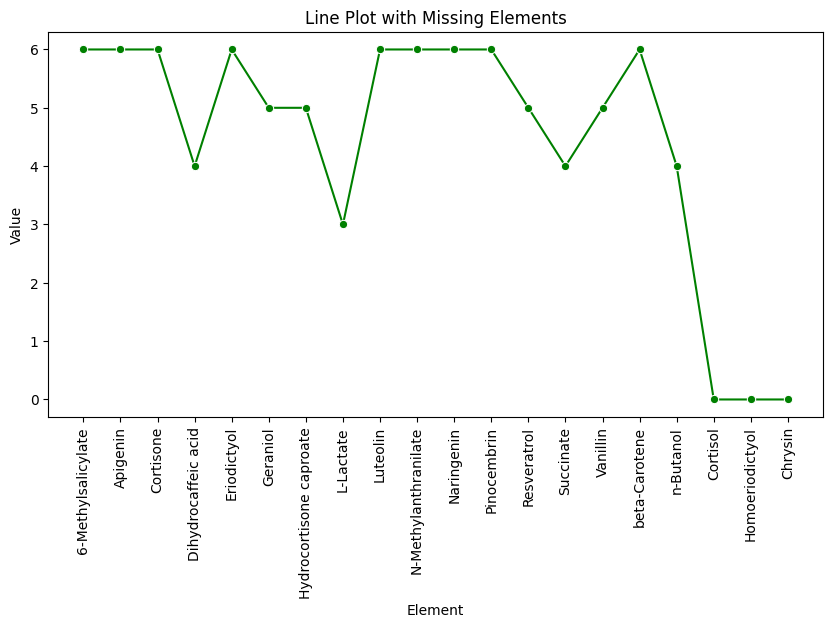

In [30]:
# plot pathway length
plt.figure(figsize=(10, 5))
sns.lineplot(data=vinyl_chloride, x='TARGET', y='LENGTH', marker='o', color = 'green')

plt.xlabel('Element')
plt.ylabel('Value')
plt.title('Line Plot with Missing Elements')
plt.xticks(rotation=90)

plt.show()

# function to find shortest source-target pairs

## Propene

In [31]:
p_min = propene[propene['LENGTH'] != 0]['LENGTH'].min()
print(p_min)

p_min_target = propene[propene['LENGTH'] == p_min]['TARGET'].iloc[0]
p_min_target

2


'n-Butanol'

## Terephthalate 

In [32]:
t_min = terephthalate[terephthalate['LENGTH'] != 0]['LENGTH'].min()
print(t_min)

t_min_target = terephthalate[terephthalate['LENGTH'] == t_min]['TARGET'].iloc[0]
t_min_target

3


'6-Methylsalicylate'

## Ethylene

In [33]:
e_min = ethylene[ethylene['LENGTH'] != 0]['LENGTH'].min()
print(e_min)

e_min_target = ethylene[ethylene['LENGTH'] == e_min]['TARGET'].iloc[0]
e_min_target

2


'L-Lactate'

## Styrene

In [34]:
s_min = styrene[styrene['LENGTH'] != 0]['LENGTH'].min()
print(s_min)

s_min_target = styrene[styrene['LENGTH'] == s_min]['TARGET'].iloc[0]
s_min_target

2


'Resveratrol'

## Vinyl chloride

In [35]:
vc_min = vinyl_chloride[vinyl_chloride['LENGTH'] != 0]['LENGTH'].min()
print(vc_min)

vc_min_target = vinyl_chloride[vinyl_chloride['LENGTH'] == vc_min]['TARGET'].iloc[0]
vc_min_target

3


'L-Lactate'

# combining graphs

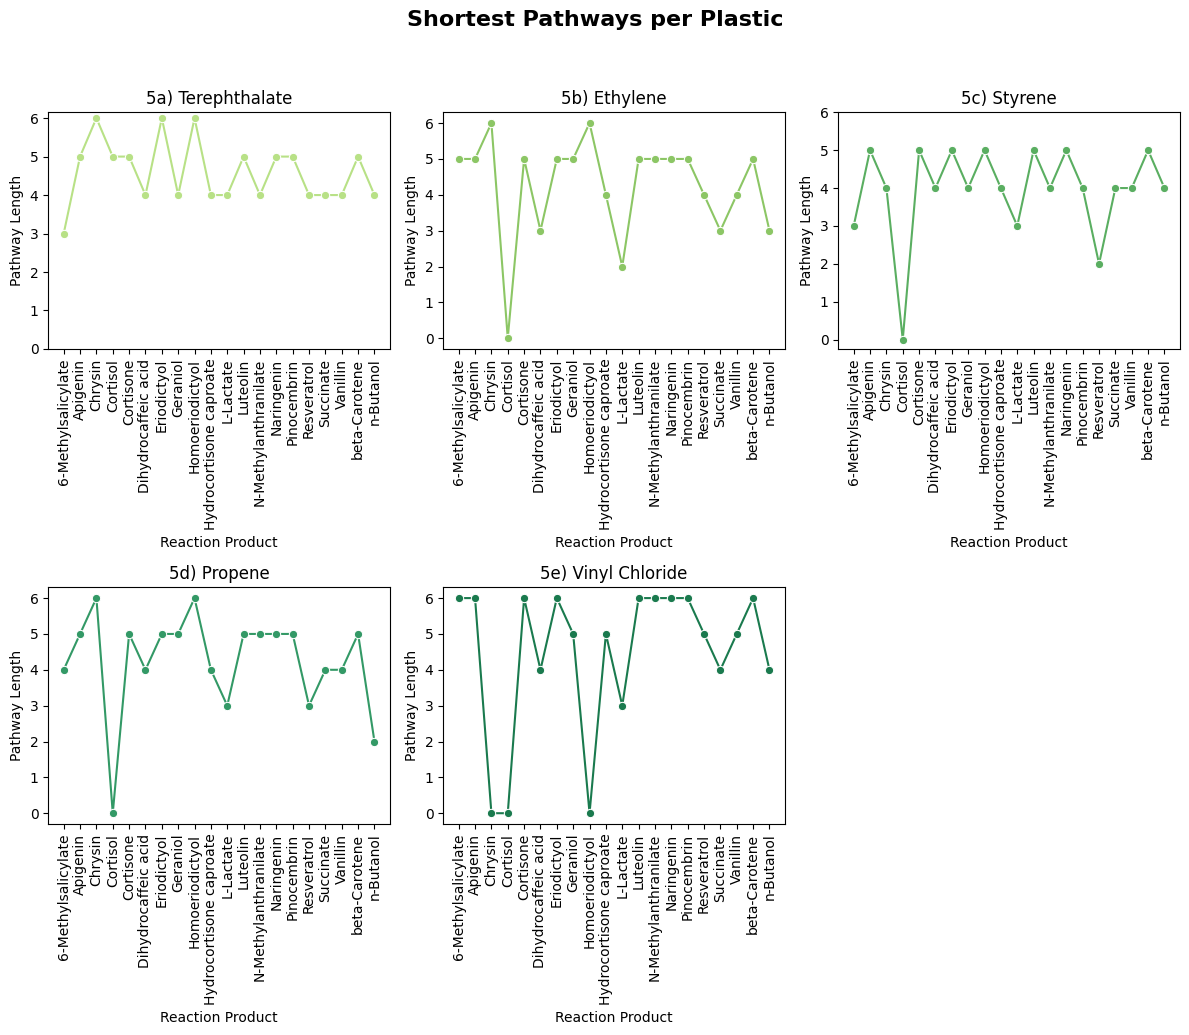

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom green palette
custom_palette = ['#b8e186', '#8cc665', '#5aae61', '#339966', '#1a7a4e']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.ravel()  # Flatten the axes array for easier indexing

# Assuming you have 5 datasets in a list called 'datasets'
datasets = [terephthalate, ethylene, styrene, propene, vinyl_chloride]

# Create a list of dataset names
dataset_names = ['Terephthalate', 'Ethylene', 'Styrene', 'Propene', 'Vinyl Chloride']

# Iterate through datasets and create line plots
for i, (dataset, name) in enumerate(zip(datasets, dataset_names)):
    # Sort the dataset by 'TARGET' column
    dataset = dataset.sort_values(by='TARGET')
    
    sns.lineplot(data=dataset, x='TARGET', y='LENGTH', marker='o', ax=axes[i], color=custom_palette[i])
    axes[i].set_xlabel('Reaction Product')
    axes[i].set_ylabel('Pathway Length')
    axes[i].set_title(name)  # Set the title as the capitalized dataset name
    
    # Set the subplot title
    axes[i].set_title(f'5{chr(97+i)}) {name}') 
    
    # Set y-tick range from 0 to 6
    axes[i].set_yticks(range(0, 7))
    
    plt.setp(axes[i].get_xticklabels(), rotation=90)

# Remove the unused last subplot
axes[-1].axis('off')

# Add main title
plt.suptitle('Shortest Pathways per Plastic', fontsize=16, y=1.03, fontweight = 'bold')

plt.tight_layout()
plt.show()